# U1T1 - Answers for the first assignment

## Chapter 2

### Exercise 1

| P<sub>1</sub>(H) | P<sub>2</sub>(H) | H-H | H-T | T-H | T-T |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 0.5 | 0.5 | 0.25 | 0.25 | 0.25 | 0.25 |
| 0.6 | 0.7 | 0.42 | 0.18 | 0.28 | 0.12 |
| 0.4 | 0.8 | 0.32 | 0.08 | 0.48 | 0.12 |
| 0.1 | 0.2 | 0.02 | 0.08 | 0.18 | 0.72 |
| 0.3 | 0.4 | 0.12 | 0.18 | 0.28 | 0.42 |

For any given combination, the answer is calculated based on the positional probability for each coin as they are different. For example, in order to get the probability for a Tails - Heads outcome for the last row we have to multiply the probabilities of the first coin landing with Tails facing up and the contrary happening for the second coin. The last value is already given in the table P<sub>2</sub> = 0.4. The first one is obtained as the complement of P<sub>1</sub>(H), i.e., P<sub>1</sub>(T) =  1 - P<sub>1</sub>(H) = 0.7.

From those, we obtain $P(T-H) = 0.7 * 0.4 = 0.28$

### Exercise 2

For starters let's grab the data available and establish what probability is desired:

* Total emails received: 1605
* Flagged emails: 963
* Filter accuracy: 98%
* Probability of being spam (P(S)): 0.6

From the wording of the exercise we want to determine the number of 'falsely' flagged email based on the probability that an email flagged (F) as spam (S) be in fact not a spam (-S). Using Bayes' Theorem:

$$P(-S|F) = \dfrac{P(F|-S) P(-S)}{P(F)}$$

The conditional probability of an genuine email being flagged is the complement of the accuracy of the filter, i.e., 0.02. Similarly, the probability of an email being genuine on its own is 1 - P(S) = 0.4. Finally, the exercise mentioned that the filter will flag 60% of the emails, so the P(F) = 0.6.

Doing the math we obtain: $P(-S|F) = \dfrac{0.02\times0.4}{0.6} \approx 0.01333$

From that we easily obtain that something around 13 (more math accurate 12.84) emails may not be spam.

### Exercise 3


In [87]:
def decipher(text: str, shift: int) -> str:
    """This function uses the Caesar cipher to decipher a text.

    The function takes two arguments: a string and an integer. The string is the text to be deciphered,
    and the integer is the shift value used in the Caesar cipher. The function returns the deciphered text.
    """

    text = text.upper()
    result = ''
    for char in text:
        if char.isalpha():
            ascii_code = ord(char)
            ascii_code -= shift
            if ascii_code < ord('A'):
                ascii_code += 26
            if ascii_code > ord('Z'):
                ascii_code -= 26
            result += chr(ascii_code)
        else:
            result += char
    return result

In [ ]:
step1 = decipher('OCZ XJMMZXO VINRZM', 7)
step2 = decipher(step1, 7)
step3 = decipher(step2, 7)
print('String after 1st iteration:', step1)
print('String after 2nd iteration:', step2)
print('String after 3rd iteration:', step3)

### Exercise 4

For this exercise we will condense the information about the probabilities in a list and use the matplotlib library in python to create the visualization for mass function and cumulative distribution

```python
# Probability for outcome 'index+1'
outcome_probabilities = [0.1, 0.15, 0.2, 0.21, 0.17, 0.09, 0.06, 0.02]
```

In [89]:
import matplotlib.pyplot as plt

In [90]:
outcome_probabilities = [0.1, 0.15, 0.2, 0.21, 0.17, 0.09, 0.06, 0.02]
outcomes = [i for i in range(1, 9)]

cumulative_probabilities = [outcome_probabilities[0]]

for i in range(1, len(outcome_probabilities)):
    cumulative_probabilities.append(outcome_probabilities[i]+cumulative_probabilities[i-1])

In [ ]:
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

ax1.bar(outcomes, outcome_probabilities, color = '#343E4A')
ax1.set_title('Probability mass function')
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Probability')

ax2.bar(outcomes, cumulative_probabilities, color = '#344A36')
ax2.set_title('Cumulative distribution function')
ax2.set_xlabel('X')
ax2.set_ylabel('P(X <= x)')

plt.show()


### Exercise 5

After extracting the data from the file and creating the vector, we proceed to apply the formulas for information entropy for each vector and the mutual information for the pair as seen in the code cells below. The mutual information function from the scikit-learn library was used as it saves us from the hassling around the calculation of all the combinations of outcomes and their probability in order to evaluate the formula $$MI_{xy} = \sum_{j\in y}\sum_{i\in x}p_{ij}\log{\left(\dfrac{p_{ij}}{p_ip_j}\right)}$$

In [92]:
import numpy as np
from sklearn.metrics import mutual_info_score

In [93]:
def info_entropy(arr):
    """This function calculates the entropy of an array using the formula H(X) = -sum(p(x) * log(p(x))).
    """
    _, arr_counts = np.unique(arr, return_counts=True)
    arr_probs = arr_counts / len(arr)

    return -sum(arr_probs * np.log(arr_probs))


In [94]:
v1 = np.array([
    'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
    'b', 'b', 'b', 'b', 'b', 'b',
    'c', 'c', 'c', 'c', 'c', 'c', 'c',
    'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd',
    'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'e',
    'f', 'f', 'f', 'f', 'f'
])

v2 = np.array([
    'a', 's', 'a', 'd', 'd', 'f', 'f', 'f', 'f',
    'g', 'g', 'g', 'g', 'h', 'h', 'h', 'h',
    'j', 'j', 'j', 'k', 'j', 'g', 'h', 'h', 'g',
    'f', 'f', 'f', 'f', 'd', 'd', 
    's', 's', 's', 's', 's', 's',
    'a', 'a', 'a', 'a', 'a', 'd', 'f', 'g'
])

entropy_v1 = info_entropy(v1)
entropy_v2 = info_entropy(v2)
mi = mutual_info_score(v1, v2)

In [ ]:
print('Entropy of v1 alone:', entropy_v1)
print('Entropy of v2 alone:', entropy_v2)
print('Mutual information between v1 and v2:', mi)
print('The amount of information gained about v1 by knowing v2 saves us', mi/entropy_v1*100, '% of the bits needed to represent v1 alone.')

## Chapter 3

### Exercise 1

![graph](assets/graph.png)

In the graph above, the number of vertexes is |V| = 5 and the number of edges that make the connections between pairs of vertexes is |E| = 5.

### Exercise 2

Considering the friend request as an effective one-way relationship and a reply as a signal for reciprocal friendship the digraph representing the situation presented is as follows

![digraph](assets/digraph.jpg)

### Exercise 3

The conversion from the previous graph to the next was made simply getting rid of the directional arrows and increasing the lineweight of the connections that are representative of reciprocal friendship, maintaining the overall aspect of the graph and changing the way information is passed. One-way friendships lose a bit of their meaning and power, though.

![no_more_digraph](assets/no_more_digraph.jpg)

### Exercise 4

For this exercise we need to obtain the correlation of each vector pair using the pandas.DataFrame.corr method, organize them so we can get the connections between vectors and keep only the positive ones as demanded. After acquiring the edges and weights using multiple data manipulation functions, the Networkx library was used to create and plot the graph generated by the correlation network.

In [94]:
import pandas as pd
import numpy as np
import networkx as nx

data = pd.read_csv('assets/ch3ex3.txt', sep='\t')

In [ ]:
corr_positive = (data.corr() * (data.corr()>0)).replace(0, np.nan)
mask = np.tril(np.ones_like(corr_positive, dtype=bool), k=-1)
edge_weights = corr_positive.where(mask).unstack().dropna().reset_index()

edge_weights.columns = ['Vertex 1', 'Vertex 2', 'Weight']
print(edge_weights)

In [ ]:
corr_net = nx.from_pandas_edgelist(edge_weights, 'Vertex 1', 'Vertex 2', 'Weight')
nx.draw_networkx(corr_net, with_labels=True, node_size=1000, width=2)

## Chapter 4

### Exercise 1

In order to get the most 'connected' vertex in each set, we use the power of networkx library to create and manipulated the graph created from the data in the file given.

In [ ]:
import networkx as nx

# Create a graph from the edgelist
G = nx.read_edgelist('assets/ch4ex1.txt')

# Prevents executing the code if the graph is not bipartite
if nx.is_bipartite(G):
    sets = nx.bipartite.sets(G) # Get the two sets of nodes

    # Calculate the degree (number of connections) of each node in each set and find the most connected node in each
    connections = dict(G.degree(sets[0])), dict(G.degree(sets[1]))
    most_connected_by_set = max(connections[0], key=connections[0].get), max(connections[1], key=connections[1].get)    

    print('In the first set the most connected node was:', most_connected_by_set[0], 'with', connections[0][most_connected_by_set[0]], 'connections.')
    print('In the second set the most connected node was:', most_connected_by_set[1], 'with', connections[1][most_connected_by_set[1]], 'connections.')

### Exercise 2

From the analysis of the data given, we conclude this multilayer graph has star coupling due to the edges for the inter-layer coupling are centered around the same node, e.g., the node 5 acts as hub to connect nodes 6 and 8 in layers 2 and 4, respectively, through layer 1. Analogous behavior is seen for nodes 1, 9 and 13, all in the first layer.

### Exercise 3

The procedure to answer this question is for certain is easier said than done. The first step is to extract the data and than create 'small' complete graphs for each hyperedge for the unipartite solution. To create the bipartite alternative we need to insert the new type that represent the hyperedge relationship but less combinatory analysis required.

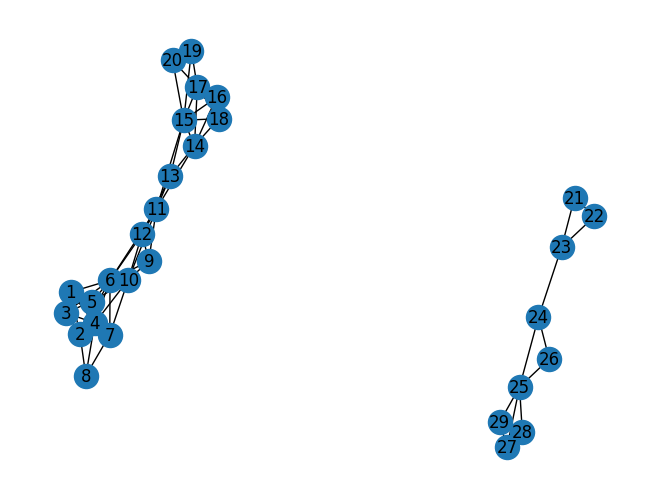

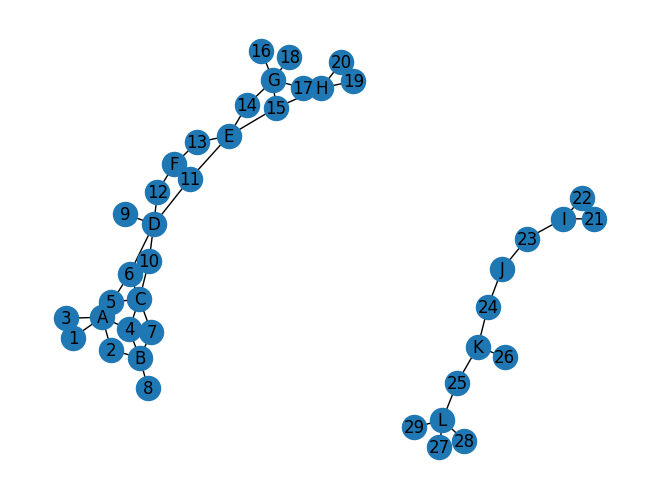

In [177]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

hyperedges = []
with open('assets/ch4ex3.txt') as f:
    for line in f:
        hyperedges.append(line.split())

# Unipartite alternative
G = nx.Graph()
for hyperedge in hyperedges:
    # Each iteration adds a complete graph representing the hyperedge into the final graph
    for edge in combinations(hyperedge, 2):
        # Since the problem didn't mention how to handle repeated edges, I'm assuming they should be ignored
        if not G.has_edge(*edge):
            G.add_edge(*edge)

# Bipartite alternative
H = nx.Graph()
edges = []
for i, hyperedge in enumerate(hyperedges):
    # Adds an edge for each node in a hyperedge paired with the corresponding letter for the hyperedge
    [edges.append((node, chr((i+ord('A'))))) for node in hyperedge]
H.add_edges_from(edges)

plt.figure(1)
nx.draw(G, with_labels=True)
plt.figure(2)
nx.draw(H, with_labels=True)
plt.show()

### Exercise 4

For this exercise I tried a different approach and gave a shot to Excel.

![excel](assets/excel.png)

By coloring the time intervals in which the edges were actives and slicing correctly the disjoint windows, we can define the edges that will be active for each of the snapshots.

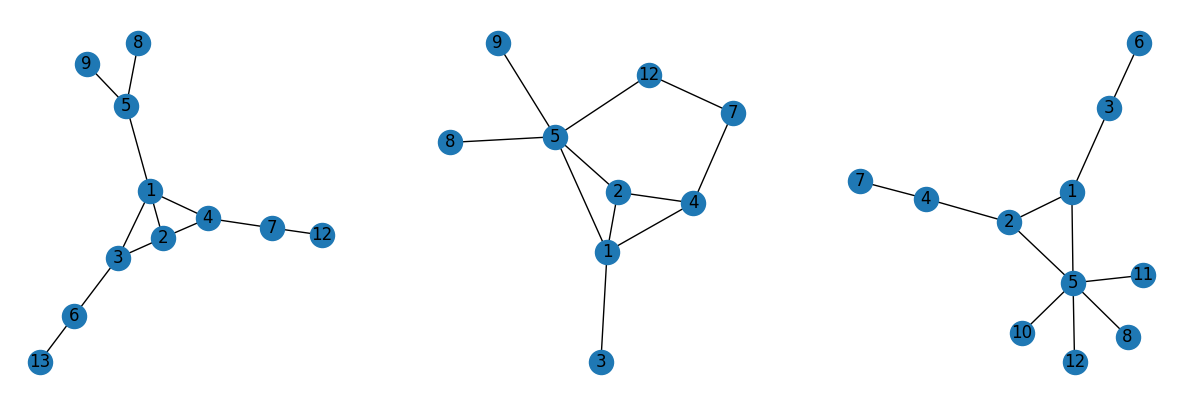

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

edgelists = [[(1,2), (1,3), (1,4), (1,5), (2,3), (2,4), (3,6), (4,7), (5,8), (5,9), (6,13), (7,12)],
             [(1,2), (1,3), (1,4), (1,5), (2,4), (2,5), (4,7), (5,8), (5,9), (5,12), (7,12)],
             [(1,2), (1,3), (1,5), (2,4), (2,5), (3,6), (4,7), (5,8), (5,10), (5,11), (5,12)]]

snap_1 = nx.from_edgelist(edgelists[0])
snap_2 = nx.from_edgelist(edgelists[1])
snap_3 = nx.from_edgelist(edgelists[2])

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(snap_1, with_labels=True)
plt.subplot(1,3,2)
nx.draw(snap_2, with_labels=True)
plt.subplot(1,3,3)
nx.draw(snap_3, with_labels=True)
plt.show()